In [8]:
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("C:/Users/Asus/Desktop/census.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [64]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["inc"] = lb_make.fit_transform(data["income"])
data["gender"] = lb_make.fit_transform(data["sex"])
data["class"] = lb_make.fit_transform(data["workclass"])
data["educlevel"] = lb_make.fit_transform(data["education_level"])
data["status"] = lb_make.fit_transform(data["marital-status"])
data["occupation"] = lb_make.fit_transform(data["occupation"])
data["race"] = lb_make.fit_transform(data["race"])
data["country"] = lb_make.fit_transform(data["native-country"])
data["relate"] = lb_make.fit_transform(data["relationship"])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35931 entries, 0 to 45221
Data columns (total 22 columns):
age                35931 non-null int64
workclass          35931 non-null object
education_level    35931 non-null object
education-num      35931 non-null float64
marital-status     35931 non-null object
occupation         35931 non-null int64
relationship       35931 non-null int32
race               35931 non-null int64
sex                35931 non-null object
capital-gain       35931 non-null float64
capital-loss       35931 non-null float64
hours-per-week     35931 non-null float64
native-country     35931 non-null object
income             35931 non-null object
gender             35931 non-null int32
educ               35931 non-null int32
inc                35931 non-null int32
class              35931 non-null int32
educlevel          35931 non-null int32
status             35931 non-null int32
country            35931 non-null int32
relate             35931 non-null int

In [17]:
import xgboost as xgb

In [79]:
features = ['age','educlevel','class', 'hours-per-week','education-num','status','occupation','race', 'gender','country','capital-gain','capital-loss']
X=data[features]

y=data['inc']

In [ ]:
X_new.shape

In [80]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4, random_state=123)

In [93]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [94]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [95]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [96]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.67%


In [97]:
precision = precision_score(y_test, predictions)
print("Precision: %.2f%%" % (precision * 100.0))

Precision: 78.36%


In [98]:
recall = recall_score(y_test, predictions)
print("Recall: %.2f%%" % (recall * 100.0))

Recall: 59.88%


In [99]:
print(model.feature_importances_)

[0.05879189 0.0067245  0.01915082 0.07078214 0.17076553 0.2765572
 0.05736041 0.01002725 0.02677315 0.01185255 0.20689298 0.08432144]


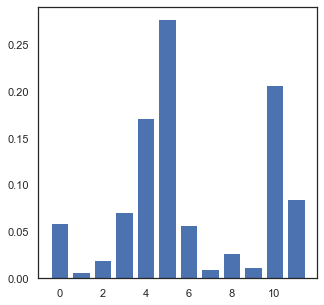

In [100]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()